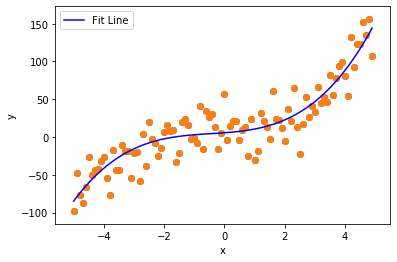

Error: 438.0737452632604


In [7]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt

# Generate datapoints:
x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y)

# Make polynomial data:
x1 = x
x2 = np.power(x1,2)
x3 = np.power(x1,3)
n = len(x1)

# Reshaping data:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

# First column of matrix X:
x_bias = np.ones((n,1))

# Form the complete x matrix:
x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

# Finding transpose:
x_new_transpose = np.transpose(x_new)

# Finding dot product of original and transposed matrix :
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

# Finding Inverse:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)# Finding the dot product of transposed x and y :
temp_2 = x_new_transpose.dot(y)

# Finding coefficients:
theta = temp_1.dot(temp_2)
theta

# Store coefficient values in different variables:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

# Plot the polynomial curve:
plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="blue",label="Fit Line")
plt.legend();plt.xlabel("x");plt.ylabel("y")
plt.show()

# Prediction function:
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
  y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
  return y_pred
 
# Making predictions:
pred = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)
 
# Calculate accuracy of model:
def err(y_pred,y):
  var = (y - y_pred)
  var = var*var
  n = len(var)
  MSE = var.sum()
  MSE = MSE/n
 
  return MSE
 
# Calculating the error:
error = err(pred,y)
print("Error:",error)